# **2022 Spring AI501 Homework assignment 3**
Read the following problem sheet and submit your completed $\texttt{ipynb}$ file.

In [1]:
import numpy as np
import numpy.random as npr
from matplotlib import pyplot as plt
from collections import Counter
import sys


## Problem 1
In this problem, we empirically check the bias-variance tradeoff using a simple linear regression model. Let $p_\text{data}(x, y)$ be a true data distribution defined as
$$
x \sim \mathrm{Unif}(0, 1), \quad y | x \sim \mathcal{N}(\sin(2\pi x), \sigma_y^2),
$$
where $\sigma_y = 0.3$. During training, we don't have an access to this distribution but we are given a finite number of i.i.d. samples from it.
$$
\mathcal{D}_\text{tr} = (x_i, y_i)_{i=1}^n \overset{\mathrm{i.i.d.}}{\sim} p_\text{data}(x, y).
$$
The following codes implement the data generating process and show an example of training data generated from them.

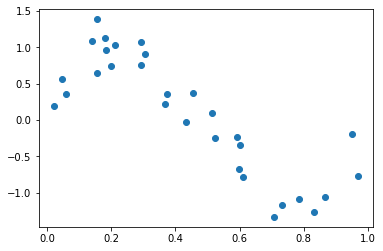

In [2]:
def f_true(x):
    return np.sin(2*np.pi*x)

def gen_data(n, sigma_y=0.3):
    x = npr.rand(n)
    y = f_true(x) + sigma_y*npr.randn(*x.shape)
    return x, y

npr.seed(42)
x_tr, y_tr = gen_data(30)
plt.plot(x_tr, y_tr, 'o')

Given $\mathcal{D}_\text{tr}$, we setup a simple linear regression model with polynomial basis function of order $m$.
$$
f_\theta(x) = \theta^\top \phi(x), \quad \phi(x) = [1, x, \dots, x^m]^\top \in \mathbb{R}^{m+1}, \quad \theta \in \mathbb{R}^{m+1}.
$$

(a) Given the feature map $\phi(x)$, we first compute the design matrix,
$$
\Phi = \begin{bmatrix} \phi(x_1) & \dots & \phi(x_n)\end{bmatrix}^\top \in \mathbb{R}^{n \times (m+1)}.
$$
Given $\Phi$, we can compute the least square estimate of $\theta$,
$$
\mathcal{L}_\text{LS}(\mathcal{D}, \theta) = \frac{1}{2}\sum_{(x,y)\in \mathcal{D}} \Vert y - f_\theta(x)\Vert^2, \quad 
\hat\theta = \underset{\theta}{\mathrm{argmin}}\,\mathcal{L}_\text{LS}(\mathcal{D}_\text{tr}, \theta).
$$
Compute the following codes computing the design matrix and $\hat\theta$. You may use functions in $\texttt{np.linalg}$ if needed.

In [3]:
# construct design matrix
def get_Phi(x, m):    
    # fill this part
    ######################################################################
    def phi(x, m): 
        phi = [x**i for i in range(0, m+1)]
        return np.transpose(phi)
    Phi = [phi(x_inter, m) for x_inter in x]
    ######################################################################
    return (Phi)

# test
print(get_Phi([1, 2, 3], 2))
######

# find least square solution
def compute_theta_LS(x, y, m):    
    # fill this part
    ######################################################################
    """ With the course linear_and_logistic page 2 we got θ_LS = [(Φ^⊤ Φ)^(−1)] * Φ^⊤ * y """
    Phi = get_Phi(x, m)
    a=(np.transpose(Phi)@Phi)
    b=(np.linalg.inv(np.transpose(Phi)@Phi))
    c=b@ np.transpose(Phi)
    ######################################################################
    return (c@y)
print(compute_theta_LS([1,2,4,3, 7], [1,2,4,3, 5], 3))

[array([1, 1, 1]), array([1, 2, 4]), array([1, 3, 9])]
[ 0.23861852  0.61433804  0.17608582 -0.02380952]


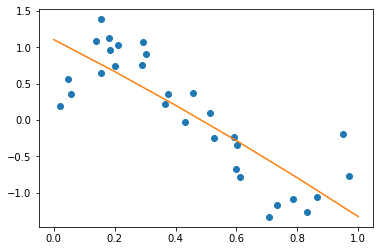

In [4]:
# small test
plt.plot(x_tr, y_tr, 'o')
theta = compute_theta_LS(x_tr, y_tr, 2)
X = np.linspace(0,1, num=6)
Y = [sum([theta_i*x**i for i, theta_i in enumerate(theta)] )  for x in (X)]
plt.plot(X,Y)

>So the expression of theta looks correct as we manadge to trace a ligne between the points. 

(b) We will compute the bias and variance of the estimators. As we learned from the class, the expected error of a generic estimator $f(\cdot;\mathcal{D})$ computed from an arbitrary dataset $\mathcal{D}$ decomposes as

$$
\mathcal{L}(\mathcal{D}) = \underbrace{\mathbb{E}_x[(\mathbb{E}_{\mathcal{D}}[f(x;\mathcal{D})] - \mathbb{E}_y[y|x])^2]}_{(\text{bias})^2} + \underbrace{\mathbb{E}_x[\mathbb{E}_{\mathcal{D}}[(f(x;\mathcal{D}) - \mathbb{E}_{\mathcal{D}}[f(x;\mathcal{D})])^2]]}_{\text{variance}} + \sigma_y^2.
$$

We are trying to estimate $(\text{bias})^2$ and $\text{variance}$ with finite number of samples, that is, $\mathcal{D}_1, \mathcal{D}_2, \dots, \mathcal{D}_N \overset{\mathrm{i.i.d.}}{\sim} p_\text{data}$ with each $\mathcal{D}_j$ contains $n$ data points. Assuming that we are given the values $\{f(x_i;\mathcal{D}_j)\}_{i=1}^n$ for $j=1,\dots, N$, complete the following code computing the empirical estimates of the $(\text{bias})^2$ and $\text{variance}$.

In [5]:
# x: x values used to approximate the outer expectation E_x (test x)
# fDs: matrix of size N * n, where N is the number of datasets and n is the number of data points per dataset.
# The jth row of fDs is constructed from the jth dataset Dj. It contains the values of f(x;D_j) evaluated at x.

def compute_bias2(x, fDs):
    # fill this part
    ######################################################################    
    # list of the ED[ f(x;D)] for all the rows 
    ED = [np.mean(fDs[i]) for i in range(0, np.shape(fDs)[0])] 
    A  = [(ED_i - EY)**2 for ED_i, EY in zip( ED, f_true(x)) ] 
    ######################################################################
    return(np.mean(A))
    
def compute_variance(x, fDs):
    # fill this part
    ######################################################################
    ED = [np.mean(fDs[i]) for i in range(0, np.shape(fDs)[0])]  # np.shape(fDs)[0] to have the number of rows
    A=[]
    for i in range (np.shape(fDs)[0]): 
      a = []
      for j in range(np.shape(fDs)[1]):
        a+= [(fDs[i][j] - ED[i])**2]                            #computes N ED [ ( f(x;D) − ED[f(x;D)] ) ** 2]
      A+=[a]
    A = np.array(A)
    
    ######################################################################
    return (np.mean(A))

(c) Now let's compare the polynomial regression models with different orders. We will compare the models with various $m$ values using $N=300$ datasets by computing $(\text{bias})^2$ and $\text{variance}$. Fill in the blanks of the following codes.

0.40473197854260556
0.5022303004971077
0.5251807180635298
0.5717653410590984
0.9501372894042613


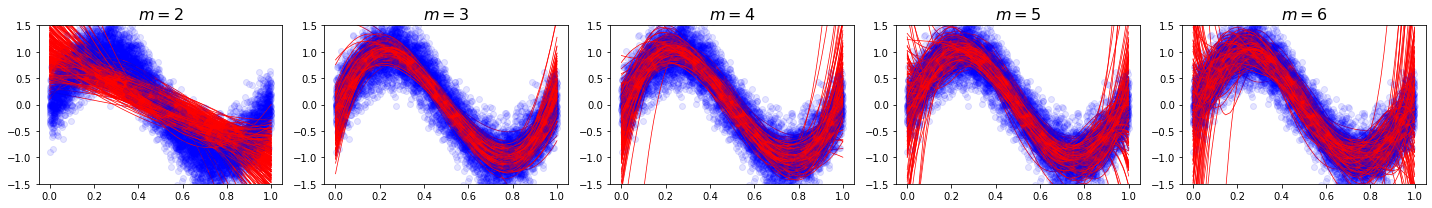

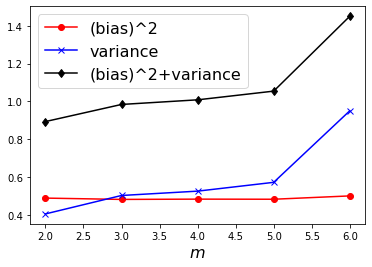

In [6]:
from pprint import pprint
# generating datasets
npr.seed(24)
n = 25
N = 300
Ds = [gen_data(n) for _ in range(N)] # Regroupe all the dataset [ Ds_1, Ds_2 ... Ds_N]
                                     # with Ds_1 = [(x_1, f(x_1, Ds_1)) , .... (x_n, f(x_n, Ds_1))]
n_test = 200
x_test = np.sort(npr.rand(n_test))

# Assess the least square estimate with the order m.
# Returns the bias^2 and variance.
def assess_LS_estimator(m, ax=None):
    # fill this part
    fDs = []
    ######################################################################
    theta_list = [compute_theta_LS(Ds_i[0], Ds_i[1] , m) for Ds_i in Ds] # list of the theta vector for each Ds 
    for theta, Ds_i  in zip(theta_list, Ds):
        fDs.append( [sum([theta_i*x**i for i, theta_i in enumerate(theta)] )  for x in x_test])
    ######################################################################

    bias2 = compute_bias2(x_test, fDs)
    variance = compute_variance(x_test, fDs)    
    print(variance)
    if ax is not None:
        # plotting    
        ax.set_title(fr'$m={m}$', fontsize=16)
        for (x, y), fD in zip(Ds, fDs):
            ax.plot(x, y, 'bo', alpha=0.1)
            ax.plot(x_test, fD, 'r-', linewidth=0.7)    
        mean_fDs = [np.mean(fD) for fD in fDs]
        #ax.plot(x_test, mean_fDs, 'r-')
        ax.set_ylim([-1.5, 1.5])

    return bias2, variance

# compare the models with m = 2, 3, ... 6.
ms = np.arange(2, 7)
fig, axes = plt.subplots(1, len(ms), figsize=(4*len(ms), 3))
bias2s, variances = np.zeros(len(ms)), np.zeros(len(ms))
for i, (m, ax) in enumerate(zip(ms, axes)):
    bias2s[i], variances[i] = assess_LS_estimator(m, ax=ax)    
plt.tight_layout()  

plt.figure()
plt.plot(ms, bias2s, 'ro-', label='(bias)^2')
plt.plot(ms, variances, 'bx-', label='variance')
plt.plot(ms, bias2s+variances, 'kd-', label='(bias)^2+variance')
plt.xlabel(r'$m$', fontsize=16)
plt.legend(fontsize=16)  

> The courbs are nice, we can se the regression is underfit when the degree of the polynom is insufficient. And the variance increase when the degree becomes too large. 

(c) Fix $m=9$. Consider a regularized least square estimator with loss function
$$
\mathcal{L}_\text{RLS}(\mathcal{D},\theta, \lambda) = \mathcal{L}_\text{LS}(\mathcal{D}, \theta) + \frac{\lambda}{2}\Vert\theta\Vert^2.
$$
Complete the following codes inspecting the bias-variance tradeoff of the regularized least square estimator with varying $\lambda$ values.

small test 
 [ 0.27159392  0.33466619  0.29315784 -0.03493986]


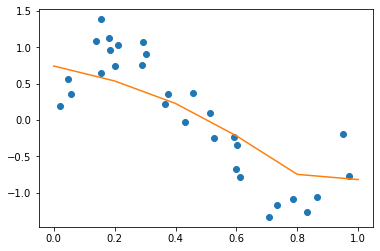

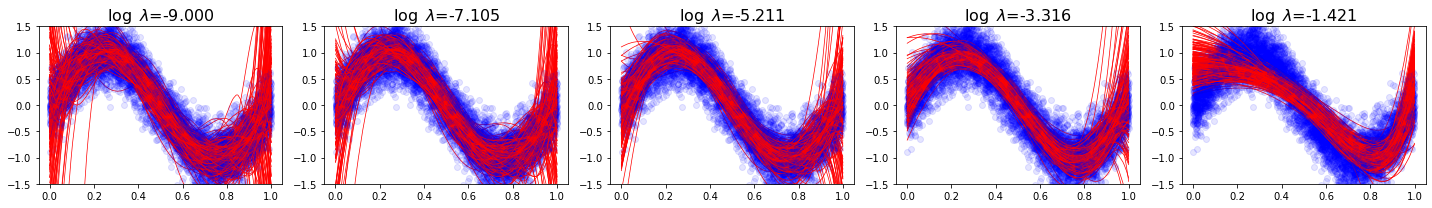

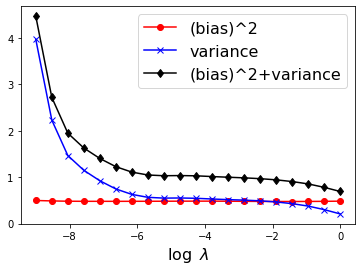

In [7]:
m=9
# find regularized least square solution
def compute_theta_RLS(x, y, m=9, lamb=1):    
    """  L_RLS(D,𝜃,𝜆)= L_RLS(x, y ,𝜃,𝜆) = L_LS(x, y ,𝜃)+(𝜆/2)*‖𝜃‖² 
     with L_LS(x, y ,𝜃)=1/2 * ∑‖𝑦−𝑓_𝜃(𝑥)‖² , with 𝑓_𝜃(𝑥)=𝜃^⊤ * 𝜙(𝑥) ,𝜙(𝑥)=[1,𝑥,…,𝑥_𝑚]^⊤
     
     but as the course linear_and_logistic page 4 shows: θRidge = (Φ^⊤*Φ + λI_h)^(−1) * Φ^⊤ * y = θRLS .
        
     y in R^n , Phi in R^(nxh) , theta in R^h 
    
    """
    
    # fill this part
    ######################################################################
    Phi = get_Phi(x, m)
    theta_RLS = (np.linalg.inv( np.transpose(Phi)@Phi + lamb*np.identity(m+1) ) 
                )  @ np.transpose(Phi) @ y   # here h = m+1 
    ######################################################################
    return theta_RLS

#small test
print("small test", '\n', compute_theta_RLS([1,2,4,3, 7], [1,2,4,3, 5], 3))
plt.plot(x_tr, y_tr, 'o')
theta = compute_theta_RLS(x_tr, y_tr, 10)
X = np.linspace(0,1, num=6)
Y = [sum([theta_i*x**i for i, theta_i in enumerate(theta)] )  for x in (X)]
plt.plot(X,Y)




# Assess the regularized least square estimate with the order m and tradeoff parameter lamb.
# Returns the bias^2 and variance
def assess_RLS_estimator(m, log_lamb, ax=None):
    """log lambda is the lambda of before with anoter name  """
    # fill this part
   
    fDs = []
    ######################################################################
    theta_list = [compute_theta_RLS(Ds_i[0], Ds_i[1] , lamb=10**log_lamb, m=m) for Ds_i in Ds] 
    # list of the theta vector for each Ds 
    for theta, Ds_i  in zip(theta_list, Ds):
        fDs.append( [sum([theta_i*x**i for i, theta_i in enumerate(theta)] )  for x in x_test])
    
    ######################################################################

    bias2 = compute_bias2(x_test, fDs)
    variance = compute_variance(x_test, fDs)    

    if ax is not None:
        # plotting    
        ax.set_title(fr'$\log\,\,\lambda$={log_lamb:.3f}', fontsize=16)
        for (x, y), fD in zip(Ds, fDs):
            ax.plot(x, y, 'bo', alpha=0.1)
            ax.plot(x_test, fD, 'r-', linewidth=0.7)    
        ax.set_ylim([-1.5, 1.5])

    return bias2, variance

# lambdas to compare
log_lambs = np.linspace(-9.0, 0.0, 20)
fig, axes = plt.subplots(1, 5, figsize=(4*5, 3))
bias2s, variances = np.zeros(20), np.zeros(20)
m = 9
for i, log_lamb in enumerate(log_lambs):
    ax = axes[i//4] if i%4 == 0 else None
    bias2s[i], variances[i] = assess_RLS_estimator(m, log_lamb, ax=ax)        
plt.tight_layout()  

plt.figure()
plt.plot(log_lambs, bias2s, 'ro-', label='(bias)^2')
plt.plot(log_lambs, variances, 'bx-', label='variance')
plt.plot(log_lambs, bias2s+variances, 'kd-', label='(bias)^2+variance')
plt.xlabel(r'$\log\,\,\lambda$', fontsize=16)
plt.legend(fontsize=16)  

On wikipedia we can read : 
"This solution closely resembles that of standard linear regression, with an extra term $\displaystyle \lambda \operatorname {I} $. If the assumptions of OLS regression hold, the solution $\displaystyle w=(\operatorname {X} ^{T}\operatorname {X} )^{-1}\operatorname {X} ^{T}y$, with $\displaystyle \lambda =0$, is an unbiased estimator, and is the minimum-variance linear unbiased estimator, according to the Gauss–Markov theorem. The term $\displaystyle \lambda n\operatorname {I} $ therefore leads to a biased solution; however, it also tends to reduce variance. This is easy to see, as the covariance matrix of the $w$-values is proportional to $\displaystyle (\operatorname {X} ^{T}\operatorname {X} +\lambda n\operatorname {I} )^{-1}$, and **therefore large values of $\displaystyle \lambda $   will lead to lower variance.**"

Which we can clearly see on the graph before that the variance goes down. We also have the bias that slightly increase. 

## Problem 2
In this problem, we will implement Principal component analysis (PCA) for image data. The following codes load, proproces, and visualize the MNIST handwritten digits dataset.


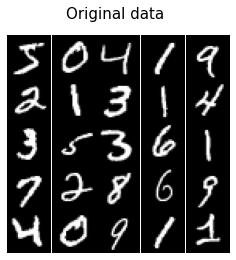

In [8]:
import numpy as np
import numpy.random as npr
from matplotlib import pyplot as plt
import tensorflow.keras as keras
(x_train, y_train), _ = keras.datasets.mnist.load_data()
# preprocess data
x = x_train.reshape((-1, 784)) / 255.0 
# center data to have zero mean
mean = x.mean(0)
x = x - mean
def plot_tiled_images(x, title=None):
    fig, axes = plt.subplots(5, 5, figsize=(4, 4))        
    for i in range(5):
        for j in range(5):
            img = (x[5*i+j] + mean).reshape((28, 28))
            axes[i,j].imshow(img, cmap='gray')
            axes[i,j].axis('off') 
              
    plt.subplots_adjust(wspace=0, hspace=0)
    if title is not None:
        plt.suptitle(title, fontsize=15)   
plot_tiled_images(x, title='Original data')

In [9]:
print (np.shape(x))


(60000, 784)


(a) Fill in the blanks of the following codes. The first function takes data $X \in \mathbb{R}^{n\times d}$ and returns a projection matrix $W \in \mathbb{R}^{d\times k}$ projecting $X$ onto $\mathbb{R}^{k}$. The second function takes data $X$ and projection matrix $W$ to project and reconstruct the data $X' \in \mathbb{R}^{n\times d}$. If PCA was done right, the reconstruction error between $X$ and $X'$ should be minimized.

Small test ====================
X shape             : (28, 28)
target dimention    : 20
reduce matrix shape : (28, 20)
return to origine   : (28, 28)
imput image


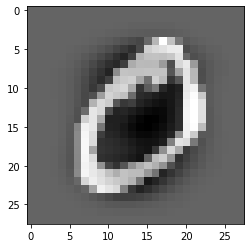

recontruct immage


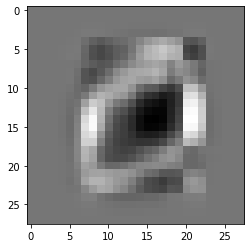

(784,)


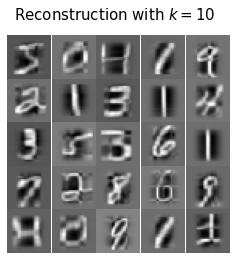

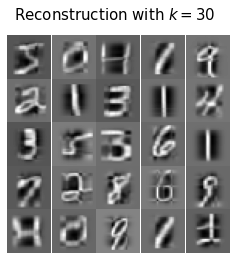

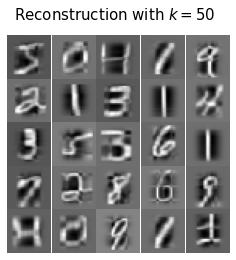

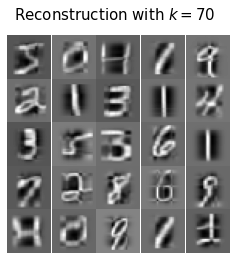

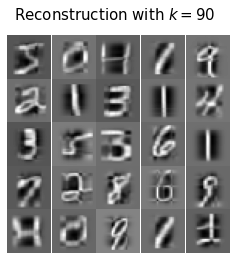

In [10]:
import numpy as np
import numpy.random as npr
from matplotlib import pyplot as plt


# computes a projection matrix to k dimensional subspace using PCA
def PCA(x, k):
    """ Take x in R^(nxd) in impout and output its projection W in R^(dxk), k is the dimention 
    of the space where X is projected 
    the data has been previosly centered to 0 
    
    WARNING : to prevent RAM issue we deal with one immage at a time here x is one image 
    """
    # fill this part
    ######################################################################
    # Calculate covariance matrix
    cov_matrix = np.cov(x)
    
    # Eigendecomposition
    values, vectors = np.linalg.eig(cov_matrix)
    
    # select the first n eigenvectors, n is desired dimension
    # of our final reduced data.
    eigenvector_subset = vectors[:,0:k]  # n_components = 2 means our final data should 
                    # be reduced to just 2 variables. if we change it to 7 then the data 
                    # reduced to 3 variables.
    
    #Transform the data 
    W = np.dot(eigenvector_subset.transpose(),x).transpose()
    ######################################################################
    return W
    
def project_and_reconstruct(x, w):
     # fill this part
    ######################################################################
    x_reconstruct = x @ w @ np.transpose(w)
    ######################################################################
    return x_reconstruct 

# Small Test 
ks         = np.arange(10, 100, 20)
target_dim = 20
img        = (x[1]).reshape((28, 28))
w          = PCA(img, target_dim)
print("Small test ====================")
print("X shape             :", np.shape(img))
print("target dimention    :", target_dim)
print("reduce matrix shape :", np.shape(w))
print("return to origine   :", np.shape(project_and_reconstruct(img, w)))
print("===============================")
# small test 
print("imput image")
plt.imshow(img, cmap='gray')
plt.show()
print("recontruct immage")
plt.imshow(project_and_reconstruct(img, w), cmap='gray')
plt.show()
print(np.shape(x[1]))
imgs = [(x[i]).reshape((28, 28)) for i in range(len(x))]

for k in ks:   
     x_reconstruct =  [ project_and_reconstruct(img, PCA(img,k)).reshape(np.shape(x[1])) for i, img in enumerate(imgs)]
     plot_tiled_images(x_reconstruct, title=rf'Reconstruction with $k={k}$')   


(b) Rather than choosing $k$ manually, we can choose $k$ in terms of the explained variance. Recall that the variance on the $j$th projected axis is given as $w_j^\top S w_j$ where $w_j$ is the $j$th column of the projection matrix $W$ and $S$ is the empirical covariance of $X$. The explained variance of the projection matrix $W$ with $k$ columns is then defined as
$$
\mathrm{EV}(k) = \frac{\sum_{j=1}^k w_j^\top S w_j}{\sum_{j=1}^d w_j^\top S w_j}.
$$
Based on $\mathrm{EV}(k)$, we can choose $k$ based on how much of the variance we would like to maintain in the projected space. For instance, if we want to project data so that 90% of the variance is explained, we can choose the smallest $k$ such that $\mathrm{EV}(k) > 0.9$.
 
Complete the following code implementing this scheme.

EVk 0.8605790798196069 k 2 thress 0.8


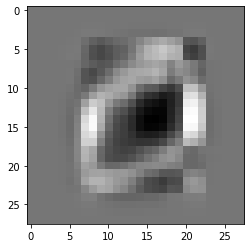

EVk 0.9371506136643066 k 3 thress 0.9


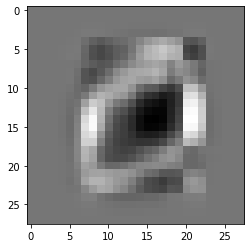

EVk 0.9755598697014286 k 4 thress 0.95


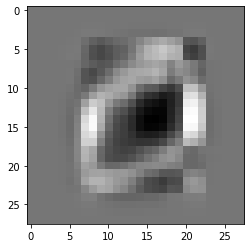

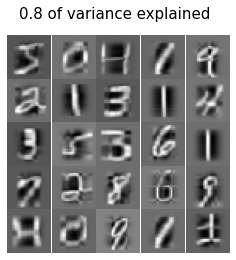

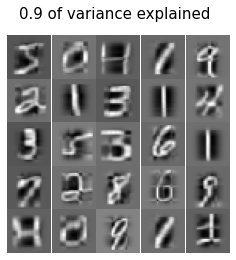

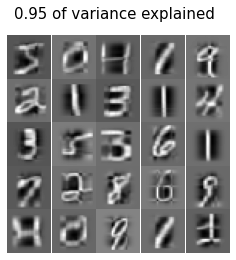

In [11]:
# PCA with k chosen to explain over thres portion of the variance
def PCA_explained_variance(x, thres):
    """ impout : x = array , tress   = int the value of k  !! HERE x correspond to obe image
        output : EV(k) int """
    # fill this part
    ######################################################################
    EV_k  = 0 
    k     = 0 
    S     = np.cov(x.T)  
    # first we compute w with w = d then we take différents k to finds the best ones
    W     = PCA(x, len(S))
    denum = sum ( [(W[:,j].T @ S @ W[:,j]) for  j in range(0,np.shape(W)[1]) ] )  # d = rows

    while EV_k<thres and k!=len(S): 
      k = k+1
      W_loop     = PCA(x, k)
      num   = sum ( [(W_loop[:,j].T @ S @ W_loop[:,j]) for  j in range(0,np.shape(W_loop)[1]) ] )  # k = colums
      EV_k  = num/denum

    ######################################################################
    return W, EV_k, k

thress = [0.8, 0.9, 0.95]
#### Small test 
for thres in thress:
    w , EV_k , k = PCA_explained_variance(x[1].reshape(28,28), thres )
    print("EVk", EV_k,"k", k,"thress", thres)
    plt.imshow(project_and_reconstruct(x[1].reshape(28,28), w),  cmap='gray')
    plt.show()
### Big test 
for thres in thress:
    x_reconstruct =  [ project_and_reconstruct(img, PCA_explained_variance(img, thres )[0]).reshape(np.shape(x[1]))
                      for i, img in enumerate(imgs[:100])]
    plot_tiled_images(x_reconstruct,
                      title=rf'{thres} of variance explained')  
 

## Problem 3
In this problem, we will implement $k$-means clustering and apply it to a 2D clustering problem. 
The following code generates and plots the data to be used.

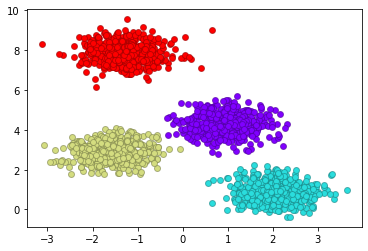

In [12]:
from sklearn.datasets._samples_generator import make_blobs
from matplotlib import cm
x, y_true = make_blobs(n_samples=2000, centers=4, cluster_std=0.50, random_state=0)
def plot_clustering(x, y):
    uy = np.unique(y)    
    colors = cm.rainbow(np.linspace(0, 1, len(uy)))
    for l, c in zip(uy, colors):
        plt.scatter(x[y==l, 0], x[y==l,1], color=c, edgecolor=0.6*c)
plot_clustering(x, y_true)


(a) Complete the following code implementing $k$-means clustering algorithm. Try to minimize the use of $\texttt{for}$ loop in the blank. Actually, you can complete it without any $\texttt{for}$ loop if you use matrix and vector multiplications properly.

In [13]:
# Takes data x of shape (num_data, dimension), number of clusters k, and maximum number of iterations.
# Returns the cluster labels z of shape (num_data,), the mean matrix of shape (k, dimension), 
# and the number of iterations run until the convergence.
def kmeans(x, k, max_num_iter, init_means=None):
    n = len(x)
    z = np.zeros(n, dtype=int) 

    # randomly initialize centers
    means = x[npr.permutation(n)[:k]].copy() if init_means is None else init_means
    # loss for checking convergence
    loss_prev = np.inf
    for i in range(max_num_iter):
        # fill this part
        ######################################################################
        index_to_vec = {}
        def diff(a):
          return (a-mean)
        a = np.zeros((len(x), k))
        for index , mean in  enumerate(means) : 
          coll = (list(map(diff,x))) # all the [[x_1 - mean1], [x2-mean1] ...[xn-mean1]]
          a[:,index] =  np.stack([np.linalg.norm(elt) for elt in coll])
          index_to_vec[index]= []
        z=np.argmin(a, axis = 1)
        counter = Counter(z)
        for j in range (len(x)): 
          index_to_vec[z[j]]+=[x[j]] 

        means  = [sum(index_to_vec[index])/counter[index]  for index in range(k) ]
        ######################################################################
        loss = np.sum([(x[i] - means[z[i]])**2 for i in range (len(x))])
        if not np.isinf(loss_prev) and abs((loss_prev-loss)/loss_prev) < 1e-7:                    
            break
        else:
          loss_prev = loss    
    return z, means, i



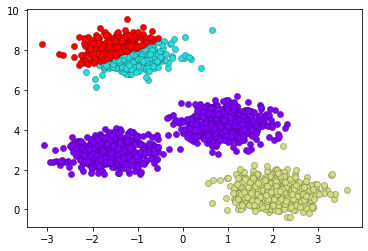

In [14]:
y_kmeans, mean, max_iter =kmeans(x, 4, 10000) 
plot_clustering(x, y_kmeans)

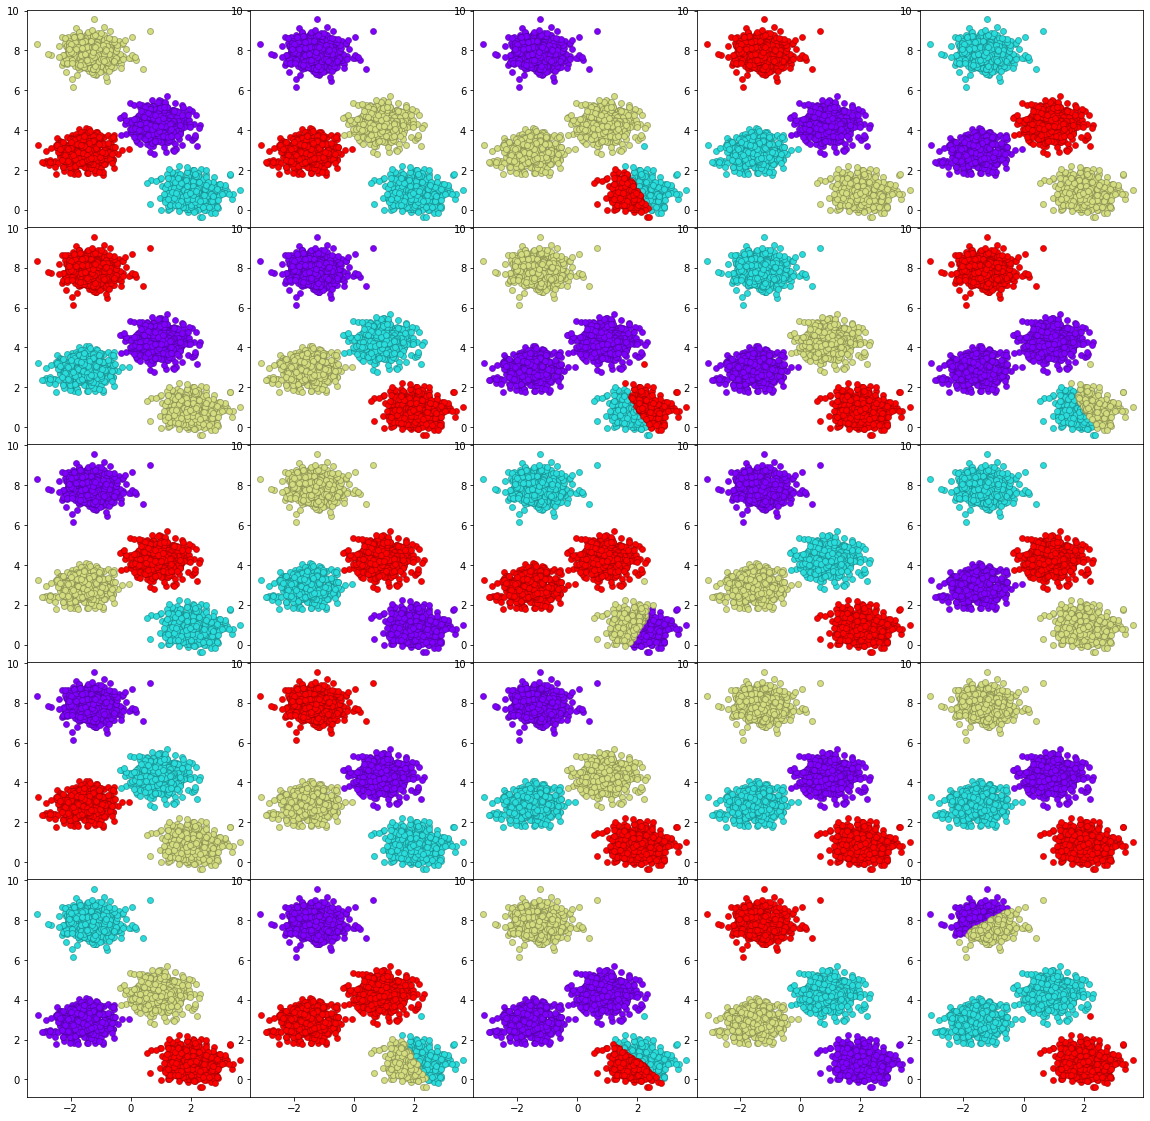

In [15]:

fig, axes = plt.subplots(5, 5, figsize=(20, 20))        
for i in range(5):
        for j in range(5):
            y, mean, max_iter =kmeans(x, 4, 100) 
            uy = np.unique(y)    
            colors = cm.rainbow(np.linspace(0, 1, len(uy)))
            for l, c in zip(uy, colors):
              axes[i,j].scatter(x[y==l, 0], x[y==l,1], color=c, edgecolor=0.6*c)
              axes[i,j].axis('on') 
plt.subplots_adjust(wspace=0, hspace=0)


As we have learned from the class, $k$-means clustering is quite sensitive to initialization. Run the following code block several times, and you will find that the algorithm occasionally fails and produces weird clustering results. Using the true label $\texttt{y_true}$, we can check whether the results given by $k$-means are good or not. We will treat a clustering result $\texttt{z}$ as a success if the adjusted Rand index (the score measuring similarity between two clustering labels) between $\texttt{y_true}$ and $\texttt{z}$ is larger than 0.95.

Converged at iter 3
Success


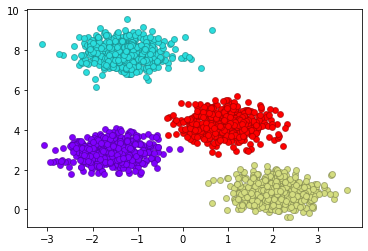

In [16]:
from sklearn.metrics import adjusted_rand_score
def check_success(z):
    return adjusted_rand_score(z, y_true) > 0.95

z, means, iter = kmeans(x, 4, 200)
print(f'Converged at iter {iter}')
if check_success(z):
    print('Success')
else:
    print('Fail')
plot_clustering(x, z)

The following code verifies the sensitivity of $k$-means to initializations by running it multiple times and counting the average success rate.

In [17]:
avg_sucess = 0
avg_iter = 0
num_trials = 500
for _ in range(num_trials):
    z, means, iter = kmeans(x, 4, 200)
    avg_sucess += check_success(z)
    avg_iter += iter
print(f'success rate {avg_sucess/num_trials:.4f}, average iteration to converge {avg_iter/num_trials:.4f}')

success rate 0.7220, average iteration to converge 8.5800


(b) Implement the $k$-means++ algorithm for initialization, and check if it improves the robustness of the algorithm. The pseudo-code of $k$-means++ can be found in the lecture note.

small test


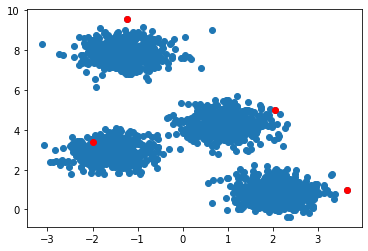

success rate 0.9920, average iteration to converge 2.3880


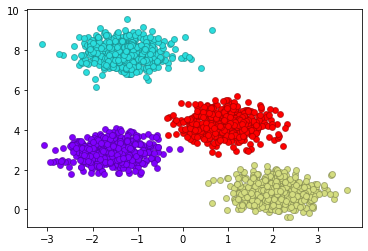

In [18]:
def kmeanspp(x, k, toPrint = False ):
    # fill this part
    ######################################################################
    # initialisation of the means: 
    #initialize(data, k):
    '''
    initialized the centroids for K-means++
    inputs:
        data - numpy array of data points having shape (200, 2)
        k - number of clusters
    '''
    ## initialize the centroids list and add
    ## a randomly selected data point to the list
    centroids = []
    centroids.append(x[np.random.randint(len(x)), :]) #we take a rando x in all the points (len(x))
 
    ## compute remaining k - 1 centroids
    for c_id in range(k - 1):
         
        ## initialize a list to store distances of data
        ## points from nearest centroid
        dist = []
        for i in range(x.shape[0]):
            point = x[i, :]
            d = sys.maxsize
             
            ## compute distance of 'point' from each of the previously
            ## selected centroid and store the minimum distance d
            for j in range(len(centroids)):
                temp_dist = np.sum((point - centroids[j])**2) 
                d = min(d, temp_dist)
            dist.append(d)
             
        ## select data point with maximum distance as our next centroid
        dist = np.array(dist)
        next_centroid = x[np.argmax(dist), :]
        centroids.append(next_centroid)
        dist = []
    centroids = np.stack([centroid for centroid in centroids])
    #print(centroids)
    if(toPrint):   
      for i in centroids:   
        plt.plot(i[0],i[1], marker="o", color="red")
      plt.scatter(x[:,0], x[:,1])
      plt.show()
    return centroids
    ######################################################################

print("small test")
means = kmeanspp(x, 4, toPrint = True)

y_kmeans, mean, max_iter =kmeans(x, 4, 10000,init_means=means ) 
plot_clustering(x, y_kmeans)

avg_sucess = 0
avg_iter = 0
num_trials =500
for _ in range(num_trials):
    z, means, iter = kmeans(x, 4, 200,init_means=kmeanspp(x, 4)  )
    avg_sucess += check_success(z)
    avg_iter += iter
print(f'success rate {avg_sucess/num_trials:.4f}, average iteration to converge {avg_iter/num_trials:.4f}')